In [3]:
# MONTH 4
from sklearn import datasets
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import argparse
import uuid
import cv2
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import argparse
import glob
import mahotas
from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils
import cv2
from IPython.display import Image

# 2.1.2: Template matching


In [2]:



# load the source and template image
source = cv2.imread('data/source_01.jpg')
template = cv2.imread('data/template.jpg')
source = cv2.imread('data/source_wally.png')
template = cv2.imread('data/template_wally.png')

(tempH, tempW) = template.shape[:2]
 
# find the template in the source image
result = cv2.matchTemplate(source, template, cv2.TM_CCOEFF)
(minVal, maxVal, minLoc, (x, y)) = cv2.minMaxLoc(result)

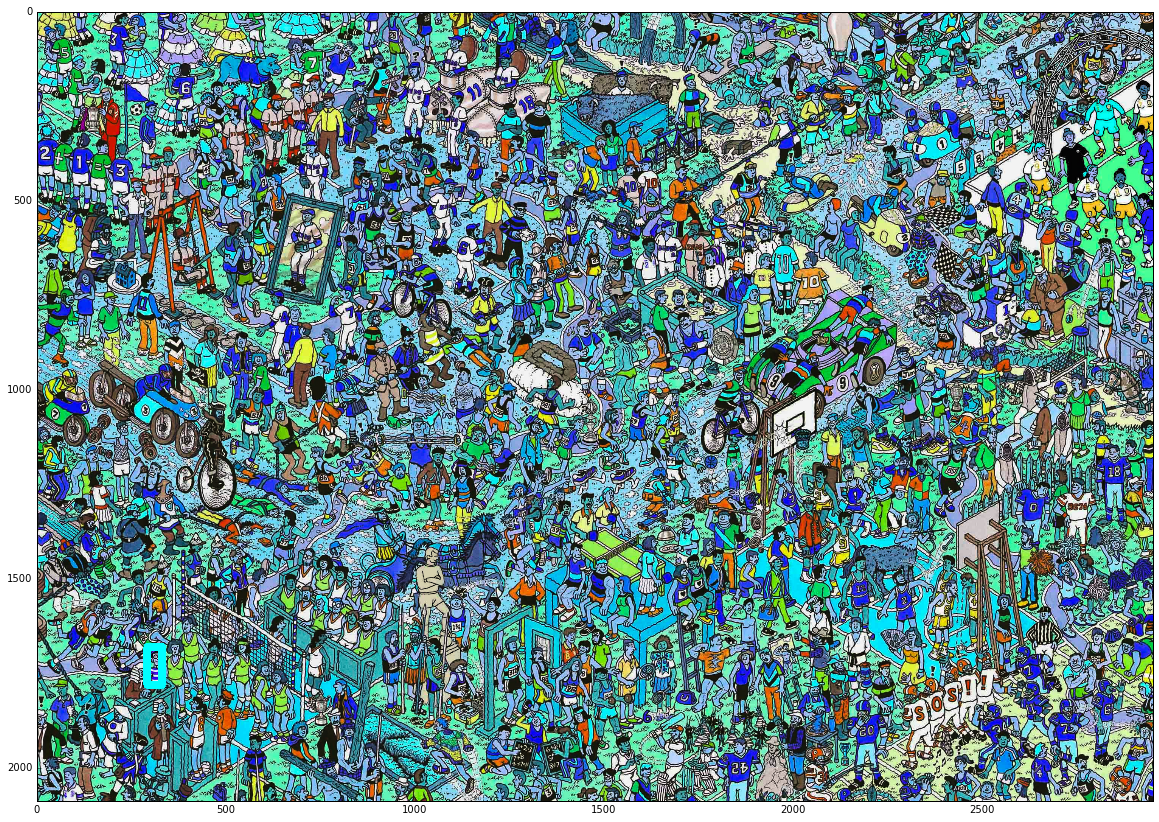

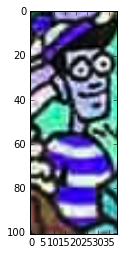

In [20]:
cv2.rectangle(source, (x, y), (x + tempW, y + tempH), (0, 255, 255), 20)
plt.figure(figsize=(20,20))
plt.imshow(source)
plt.figure()
plt.imshow(template)

[INFO] gathering images and bounding boxes...
[INFO] training detector...
[INFO] dumping classifier to file...


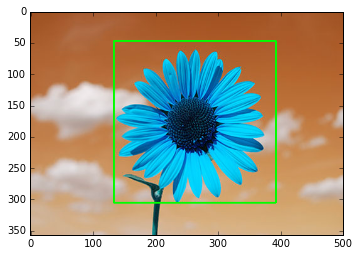

In [11]:

# import the necessary packages

# import the necessary packages
from __future__ import print_function
from imutils import paths
from scipy.io import loadmat
from skimage import io
import argparse
import dlib

 
    
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-c", "--class", required=True,
#     help="Path to the CALTECH-101 class images")
# ap.add_argument("-a", "--annotations", required=True,
#     help="Path to the CALTECH-101 class annotations")
# ap.add_argument("-o", "--output", required=True,
#     help="Path to the output detector")
# args = vars(ap.parse_args())

args = {}
args['class'] = 'data/stop_sign_images/'
args['output'] = 'data/stop_sign_detector_output.svm'
args['annotations'] = 'data/stop_sign_annotations/'


args['class'] = 'data/sunflowers/sunflower_images/'
args['output'] = 'data/stop_sign_detector_output.svm'
args['annotations'] = 'data/sunflowers/sunflower_annotations/'






# grab the default training options for our HOG + Linear SVM detector, then initialize the
# list of images and bounding boxes used to train the classifier
print("[INFO] gathering images and bounding boxes...")
options = dlib.simple_object_detector_training_options()
images = []
boxes = []
 
# loop over the image paths
for imagePath in paths.list_images(args["class"]):
    # extract the image ID from the image path and load the annotations file
    imageID = imagePath[imagePath.rfind("/") + 1:].split("_")[1]
    imageID = imageID.replace(".jpg", "")
    p = "{}/annotation_{}.mat".format(args["annotations"], imageID)
    annotations = loadmat(p)["box_coord"]

    # loop over the annotations and add each annotation to the list of bounding
    # boxes
    bb = [dlib.rectangle(left=long(x), top=long(y), right=long(w), bottom=long(h))
            for (y, h, x, w) in annotations]
    boxes.append(bb)

    # add the image to the list of images
    images.append(io.imread(imagePath))
    
# train the object detector
print("[INFO] training detector...")
detector = dlib.train_simple_object_detector(images, boxes, options)
 
# dump the classifier to file
print("[INFO] dumping classifier to file...")
detector.save(args["output"])
 
# visualize the results of the detector
# win = dlib.image_window()
# win.set_image(detector)
# dlib.hit_enter_to_continue()

detector = dlib.simple_object_detector('data/stop_sign_detector_output.svm')


for testingPath in paths.list_images('data/sunflowers/sunflower_test/'):
    # load the image and make predictions
    image = cv2.imread(testingPath)
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # loop over the bounding boxes and draw them
    for b in boxes:
        (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

    # show the image
    plt.figure()
    plt.imshow(image)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)

In [14]:
list(boxes)

[rectangle(133,47,391,305)]

# 3.3.1: Defining your image descriptor


# 3.3.2: Feature extraction and indexing

Different types of image descriptors:
    
- COLOR ( histograms, color statistics)  
- Texture ( Harlick, Local Binary Patterns) 
- Shape  ( Zernike Moments, Hu Moments, HOG)

Specialized data strucutres to store features:
- kd-tree  
- random projection forest  
- inverted index  

# 3.3.3: Defining your similarity metric

In [16]:
A = [0.64, 0.13, 0.41, 0.29, 0.56, 0.99, 0.11, 0.30]
B = [0.18, 0.87, 0.32, 0.71, 0.44, 0.27, 0.02, 0.41]

In [17]:
from sklearn.metrics import euclidean_distances, hinge_loss

In [18]:
euclidean_distances(A, B)

/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.22339691]])

In [28]:
A = [0.77, 0.43, 0.96, 0.92, 0.56, 0.65, 0.84, 0.21]
B = [0.04, 0.96, 0.87, 0.98, 0.39, 0.78, 0.67, 0.33]
hist_inter = lambda x,y: np.sum(np.minimum(x, y))
hist_inter(A, B)

A = np.array([0.16, 0.04, 0.12, 0.03, 0.14, 0.17, 0.06, 0.27])
B = np.array([0.08, 0.12, 0.07, 0.13, 0.04, 0.22, 0.27, 0.08])

from sklearn.metrics import pairwise_distances


def chi2_distance(histA, histB, eps=1e-10):
    return 0.5 * np.sum(((histA - histB) ** 2) / (histA + histB + eps))

A = [0.81, 0.84, 0.31, 0.13, 0.96, 0.48, 0.58, 0.65]
B = [0.82, 0.31, 0.50, 0.38, 0.74, 0.59, 0.62, 0.94]

pairwise_distances(A, B, metric='cosine')

A = [1, 1, 0, 1, 0, 1, 0, 1]
B = [0, 0, 0, 0, 0, 0, 0, 1]

pairwise_distances(A, B, metric='hamming')

# 4.5: k-means clustering

https://gurus.pyimagesearch.com/lessons/k-means-clustering/

In [4]:

# import the necessary packages
from sklearn.cluster import KMeans
import numpy as np
import random
import cv2

# initialize the list of color choices
colors = [
# shades of red, green, and blue
    (138, 8, 8), (180, 4, 4), (223, 1, 1), (255, 0, 0), (250, 88, 88),
    (8, 138, 8), (4, 180, 4), (1, 223, 1), (0, 255, 0), (46, 254, 46),
    (11, 11, 97), (8, 8, 138), (4, 4, 180), (0, 0, 255), (46, 46, 254)]

# initialize the canvas
canvas = np.ones((400, 600, 3), dtype="uint8") * 255

# loop over the canvas
for y in xrange(0, 400, 20):
    for x in xrange(0, 600, 20):
        # generate a random (x, y) coordinate, radius, and color for
        # the circle
        (dX, dY) = np.random.randint(5, 10, size=(2,))
        r = np.random.randint(5, 8)
        color = random.choice(colors)[::-1]

    # draw the circle on the canvas
        cv2.circle(canvas, (x + dX, y + dY), r, color, -1)

# pad the border of the image
canvas = cv2.copyMakeBorder(canvas, 5, 5, 5, 5, cv2.BORDER_CONSTANT,
value=(255, 255, 255))

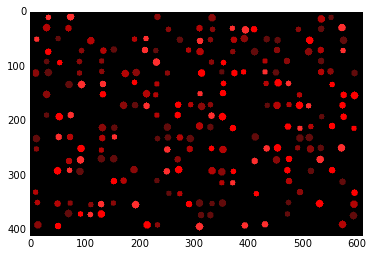

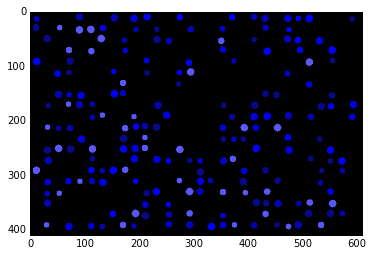

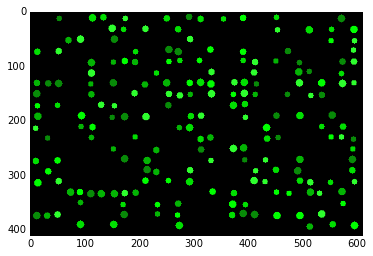

In [5]:

# convert the canvas to grayscale, threshold it, and detect contours
# in the image
gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
(cnts, _) = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
 
# initialize the data matrix
data = []
 
# loop over the contours
for c in cnts:
    # construct a mask from the contour
    mask = np.zeros(canvas.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    features = cv2.mean(canvas, mask=mask)[:3]
    data.append(features)
    
# cluster the color features
clt = KMeans(n_clusters=3)
clt.fit(data)
cv2.imshow("Canvas", canvas)
 
# loop over the unique cluster identifiers
for i in np.unique(clt.labels_):
    # construct a mask for the current cluster
    mask = np.zeros(canvas.shape[:2], dtype="uint8")

    # loop over the indexes of the current cluster and draw them
    for j in np.where(clt.labels_ == i)[0]:
        cv2.drawContours(mask, [cnts[j]], -1, 255, -1)

    # show the output image for the cluster
#     cv2.imshow("Cluster", cv2.bitwise_and(canvas, canvas, mask=mask))
    plt.figure()
    plt.imshow(cv2.bitwise_and(canvas, canvas, mask=mask))
#     cv2.waitKey(0)
    

In [1]:
cnts

NameError: name 'cnts' is not defined